In [28]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


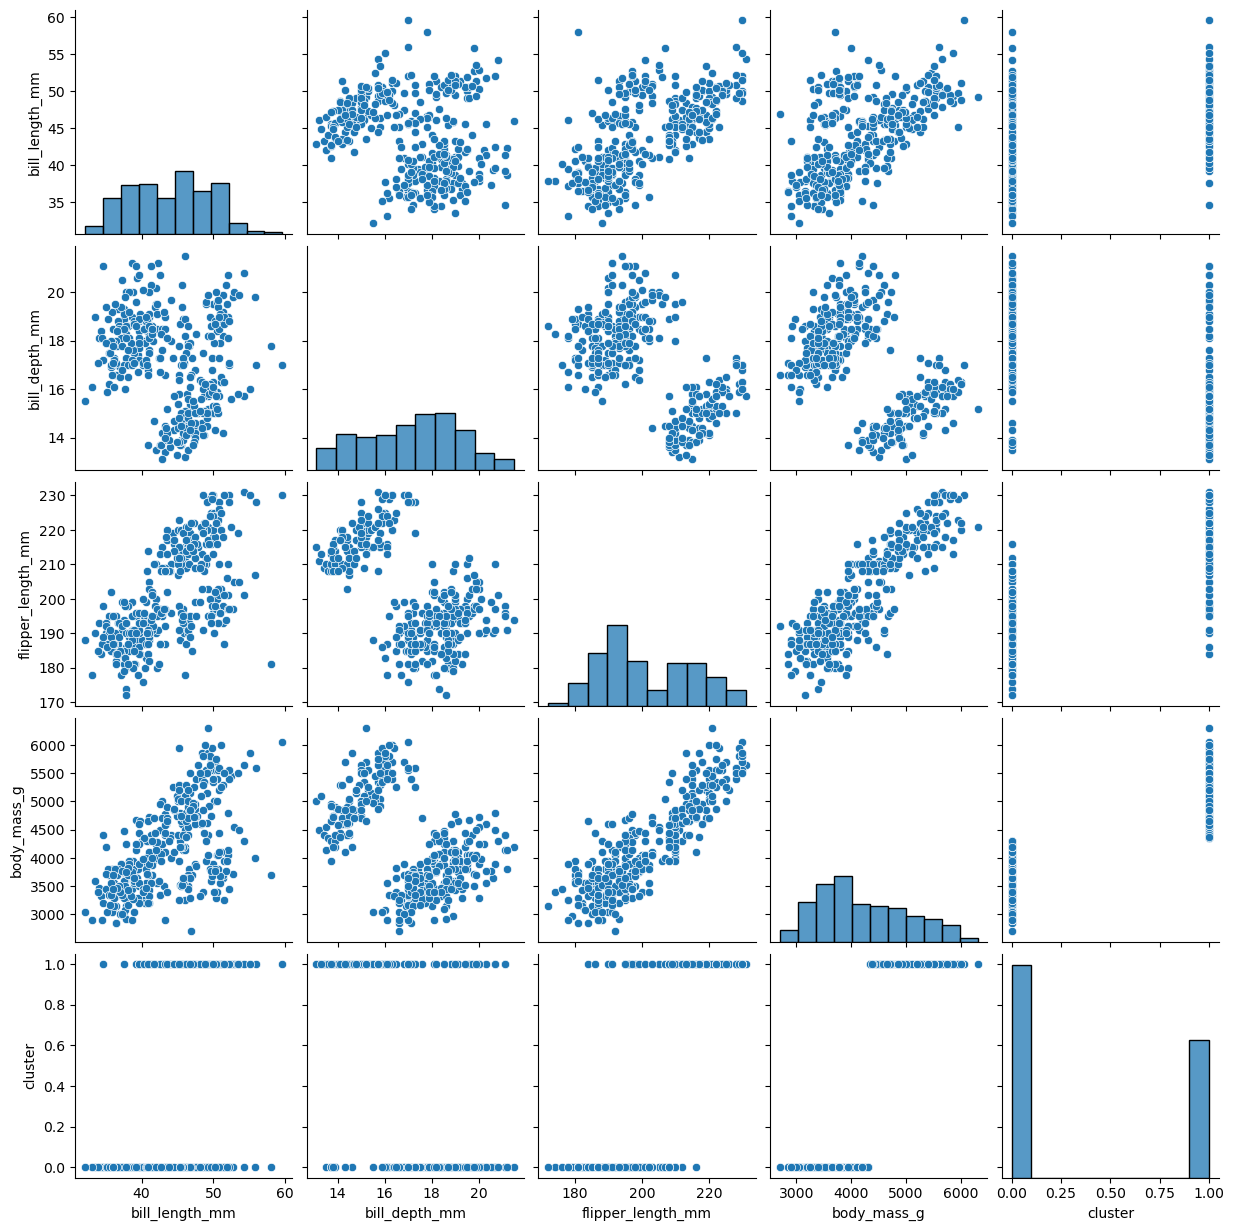

In [99]:
sns.pairplot(penguins)
plt.show()

Hoeveel clusters verwacht denk je dat er zijn?
Verwacht 2 clusters. Op de meeste plots zijn vaak 2 clusters duidelijk te onderscheiden

In [92]:
features = ['bill_length_mm','bill_length_mm','flipper_length_mm', 'body_mass_g']
# features = ['body_mass_g','flipper_length_mm']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features].fillna(1).dropna())

In [102]:
penguins['cluster'] = km.predict(penguins[features].fillna(1).dropna())

In [103]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0


In [104]:
penguins.cluster.value_counts()

0    209
1    135
Name: cluster, dtype: int64

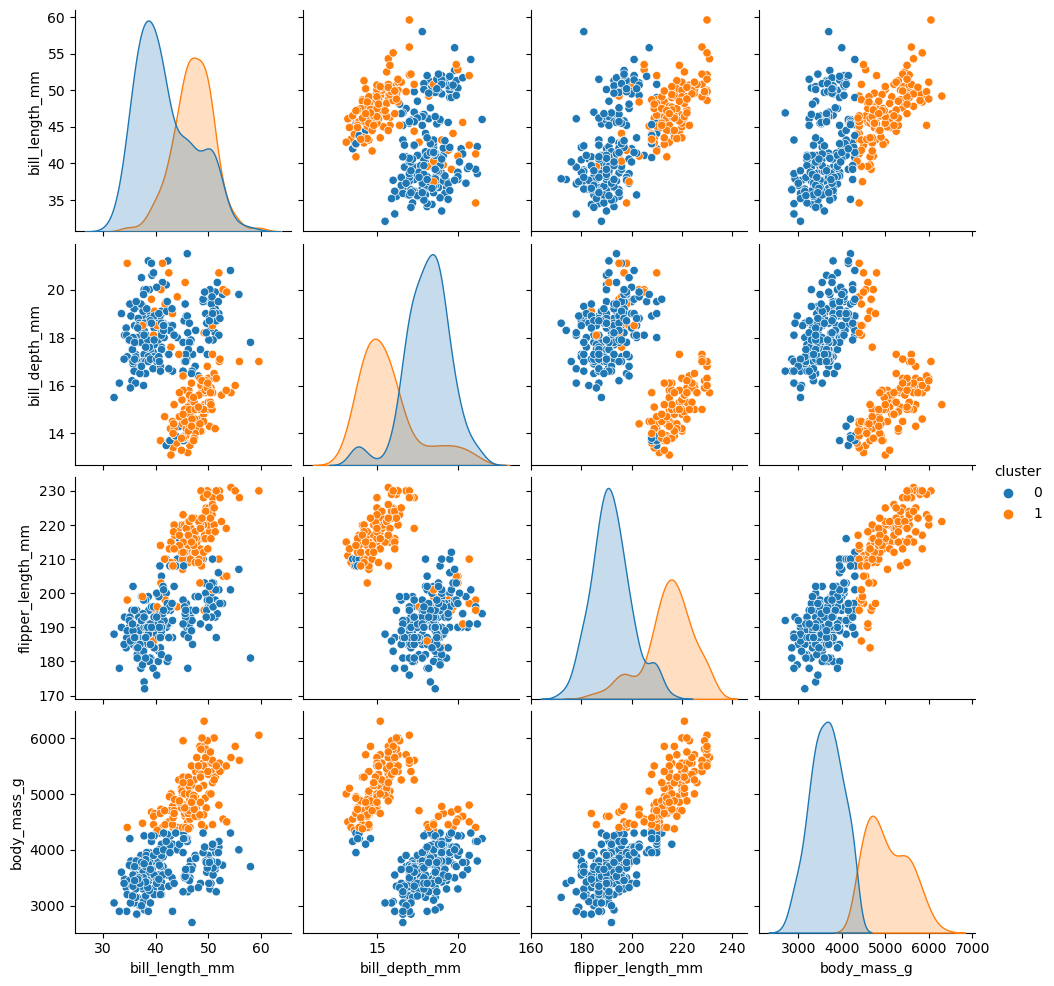

In [105]:
sns.pairplot(penguins, hue="cluster")
plt.show()

In [106]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [107]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features].fillna(1).dropna(), km.labels_, metric='euclidean')

0.6174517002134019

In [108]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,137,15
Chinstrap,63,5
Gentoo,9,115


In cluster 0 zijn 2 species in grotere hoeveelheden aanwezig dan in cluster 1. De 3e specie is daarentegen veel meet aanwezig in cluster 1 dan cluster 0. Hierop is uit te maken dat de Species "Adelie" & "Chinstrap" veel op elkaar lijken.